<a href="https://colab.research.google.com/github/jinhyung426/tensorflow/blob/main/tf_chap1_computer_vision_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow

## Part 1. Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning

## (2) Filters

In [3]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

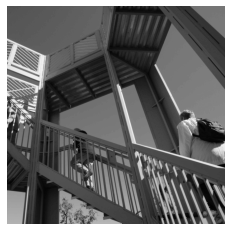

In [4]:
image = misc.ascent()

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(image)

In [6]:
image_transformed = np.copy(image)
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]


# Convolution

In [27]:
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# Apply weight to make the sum of all values of the filter to be 1
weight = 1

for x in range(1, size_x - 1):
  for y in range(1, size_y - 1):
    convolution = 0.0
    convolution = convolution + (image[x - 1, y - 1] * filter[0][0])
    convolution = convolution + (image[x, y - 1] * filter[0][1])
    convolution = convolution + (image[x+1, y - 1] * filter[0][2])
    convolution = convolution + (image[x - 1, y] * filter[1][0])
    convolution = convolution + (image[x, y] * filter[1][1])
    convolution = convolution + (image[x, y+1] * filter[1][2])
    convolution = convolution + (image[x+1, y-1] * filter[2][0])
    convolution = convolution + (image[x+1, y] * filter[2][1])
    convolution = convolution + (image[x+1, y+1] * filter[2][2])
    convolution = convolution * weight

    if convolution < 0:
      convolution = 0
    elif convolution > 255:
      convolution = 255

    image_transformed[x, y] = convolution

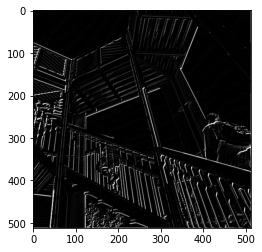

In [29]:
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
# plt.axis('off')
plt.show()

# Pooling

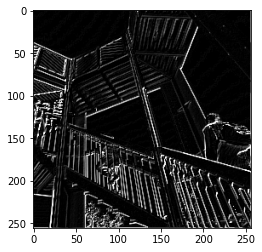

In [30]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()     